In [4]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
from shapely import geometry
import json
import googlemaps
import re
from functools import partial
import ast 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# import contextily as cx
from IPython.display import display

In [5]:
places_df = pd.read_csv('data/places_TA.csv')

In [44]:
df = pd.read_csv('data/reviews_TA.csv')

In [32]:
hotels_df = pd.read_csv('data/hotels_TA.csv')

In [61]:
df.merge(places_df[['url', 'Category AN']], how = 'left')['Category AN'].value_counts()

тематические парки           1304
достопримечательности        1247
природные объекты            1202
культурные институции         552
бары и клубы                  140
зеленые зоны                   42
экскурсии и мастер-классы      35
Name: Category AN, dtype: int64

Text(0.5, 1.0, 'Распределение мест пребывания пользователей')

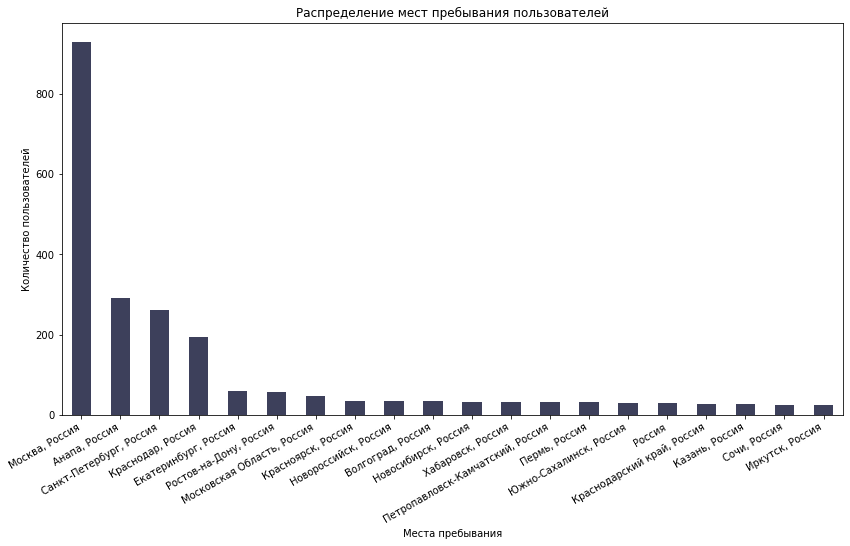

In [49]:
# df.location.value_counts()[:20]
df.location.value_counts()[:20].sort_values(ascending = False).plot.bar(color ="#3D405B", figsize = (14, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Места пребывания')
plt.ylabel('Количество пользователей')
plt.title('Распределение мест пребывания пользователей')

Text(0.5, 1.0, 'Распределение целевых групп по типу отдыха')

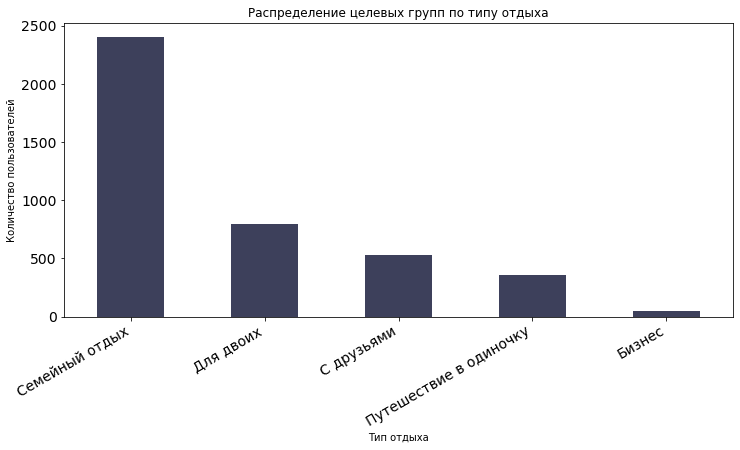

In [59]:
# df.location.value_counts()[:20]
df.category.value_counts()[:20].sort_values(ascending = False).plot.bar(color ="#3D405B", figsize = (12, 6), fontsize = 14)
plt.gcf().autofmt_xdate()
plt.xlabel('Тип отдыха')
plt.ylabel('Количество пользователей')
plt.title('Распределение целевых групп по типу отдыха')

In [53]:
df.loc[df.category == 'Тип поездки: Семейная поездка', 'category'] = 'Семейный отдых'
df.loc[df.category == 'Тип поездки: Поездка с друзьями', 'category'] = 'С друзьями'
df.loc[df.category == 'Тип поездки: Романтическая поездка', 'category'] = 'Для двоих'
df.loc[df.category == 'Тип поездки: Поездка в одиночку', 'category'] = 'Путешествие в одиночку'

In [54]:
df.category.value_counts()

Семейный отдых            2403
Для двоих                  794
С друзьями                 529
Путешествие в одиночку     362
Бизнес                      49
Name: category, dtype: int64

# Распределение категорий по нормированному рейтингу
Рейтинг определяется как сумма нормированных показателей от 0 до 1: количество фотографий, количество отзывов и рейтинг места

Можно говорить о том, что в категории Парк большинство мест не находятся в топе, однако есть место - выброс, которое имеет высокий показатель рейтинга

Text(0.5, 1.0, 'Распределение категорий по среднему нормированному рейтингу')

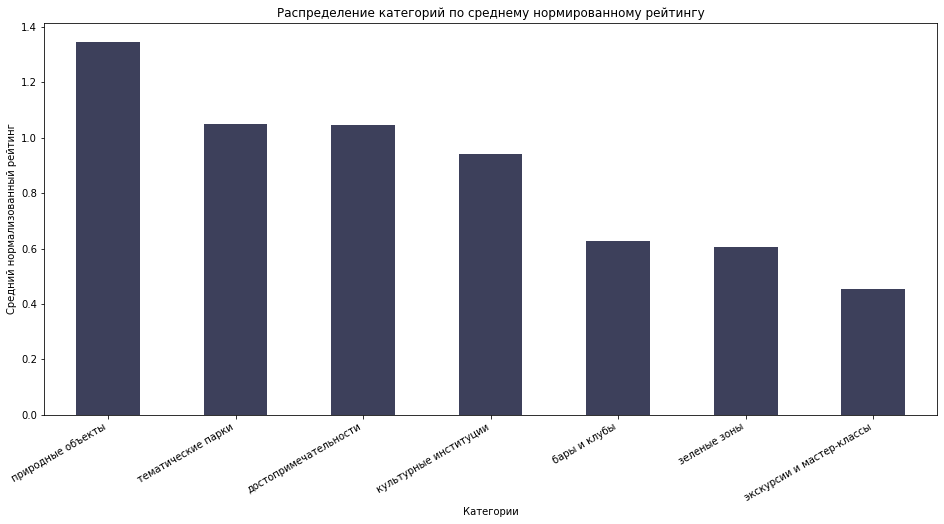

In [29]:
places_df.groupby('Category AN').mean()['normalized_rating'].sort_values(ascending = False).plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему нормированному рейтингу')

Text(0.5, 1.0, 'Распределение категорий по среднему нормированному рейтингу')

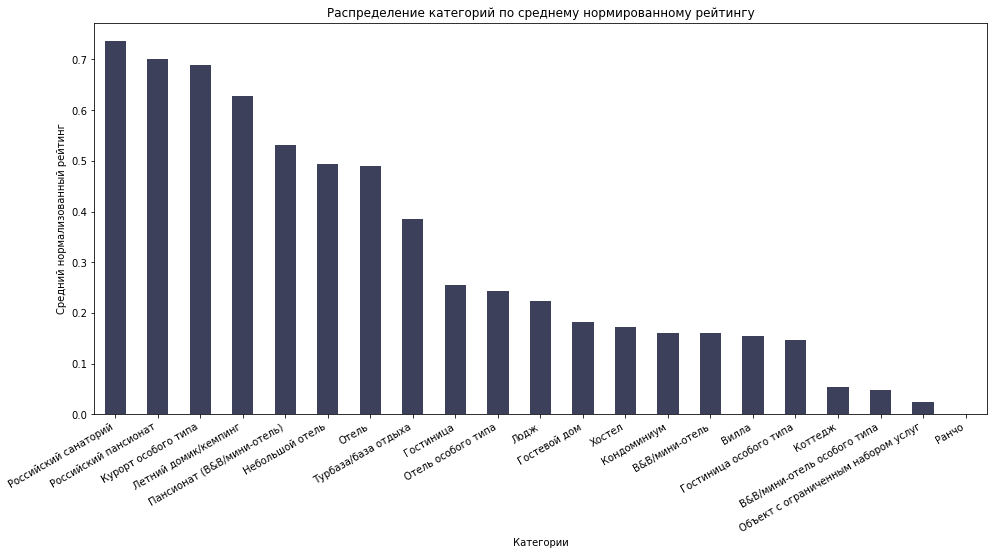

In [37]:
hotels_df.groupby('category').mean()['normalized_rating'].sort_values(ascending = False).plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему нормированному рейтингу')

Text(0.5, 1.0, 'Распределение категорий по медиане нормированного рейтинга')

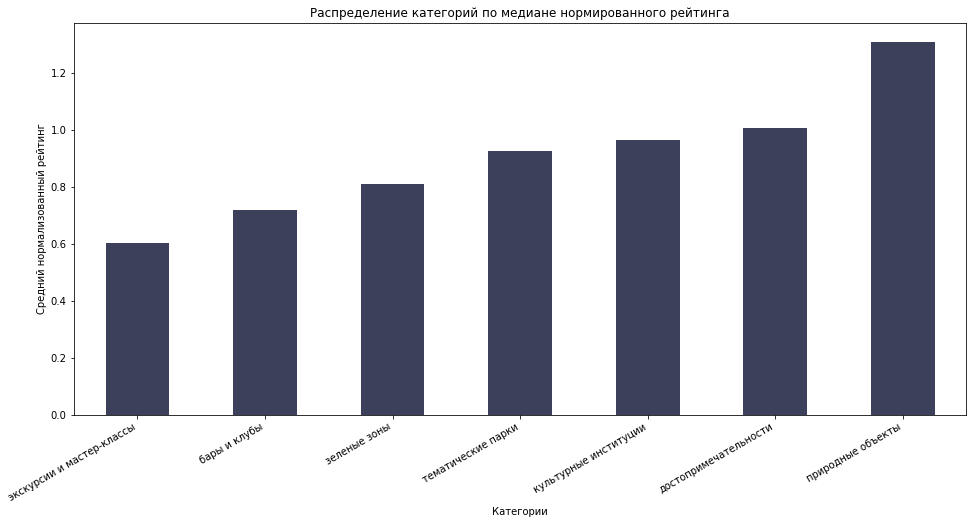

In [8]:
places_df.groupby('Category AN').median()['normalized_rating'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане нормированного рейтинга')

Остановки, локальности и площади зачастую не имеют никаких оценок. Большей популярностью обладает категория Культура за счет кинотеатров, религии и музеев. Не отстают и зеленые зоны. Для зеленых зон большую популярность имеют сады и бульвары. Пользователи большую активность проявляют для мест-аттракторов и меньшую для обыденных: здоровье, услуга, магазин. Почти по всем показателям медианы выше средних значений, это значит, что преобладают места с показателем рейтинга выше среднего.

# Распределение категорий по количеству фотографий

Категории Парк, зоопарк и аттракционы имеют единичные места с большим числов фотографий. В основном же, в других местах фотографии также публикуются, но не в таких больших количествах. Особенно отличительна категория сады, которым пользователи выкладывают фотографии в большом количестве.

Text(0.5, 1.0, 'Распределение категорий по среднему числу фотографий GP')

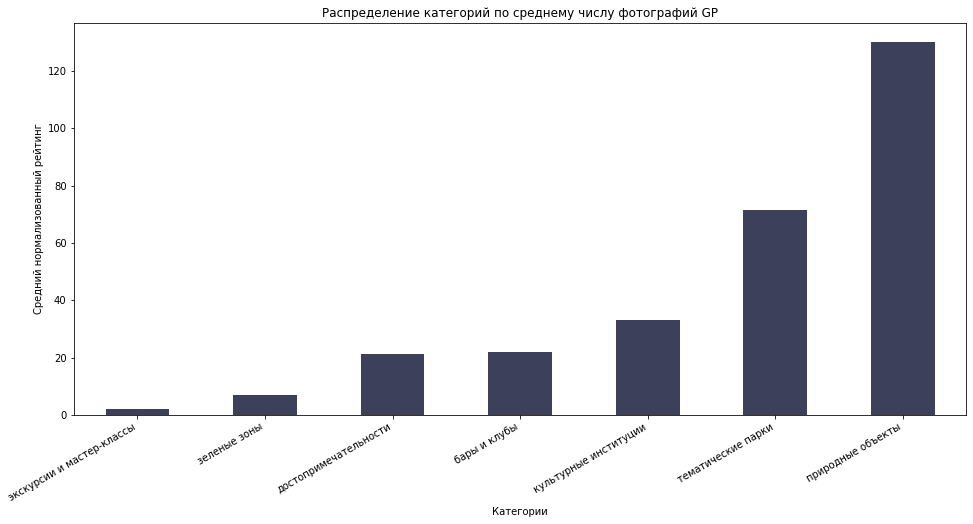

In [9]:
places_df.groupby('Category AN').mean()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по среднему числу фотографий GP')

В основном пользователи предпочитают публиковать фото из открытых пространств: зеленых зон, зоопарков, развлекательных парков, пляжей. Не смотря на то, что категория мост по рейтингу имеет не высокие показатели, по числу фотографий, можно сказать, что пользователи интересуются этой категорией. А значит, юзеры обычно фотографируют мост, а не пишут о них отзывы или возможно ставят низкие оценки.

Text(0.5, 1.0, 'Распределение категорий по медиане числа фотографий GP')

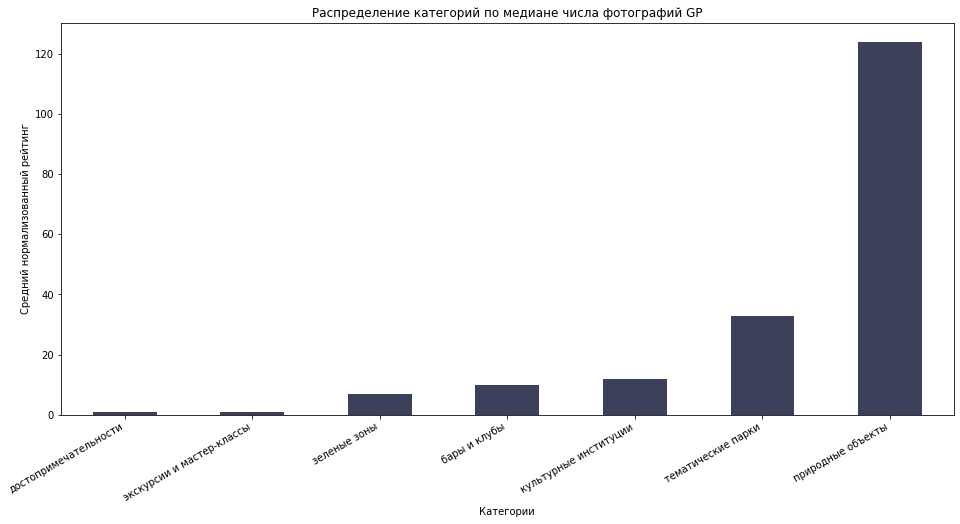

In [10]:
places_df.groupby('Category AN').median()['count_photo'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа фотографий GP')

# Распределение категорий по количеству отзывов

Text(0.5, 1.0, 'Распределение категорий по среднему числу отзывов TA')

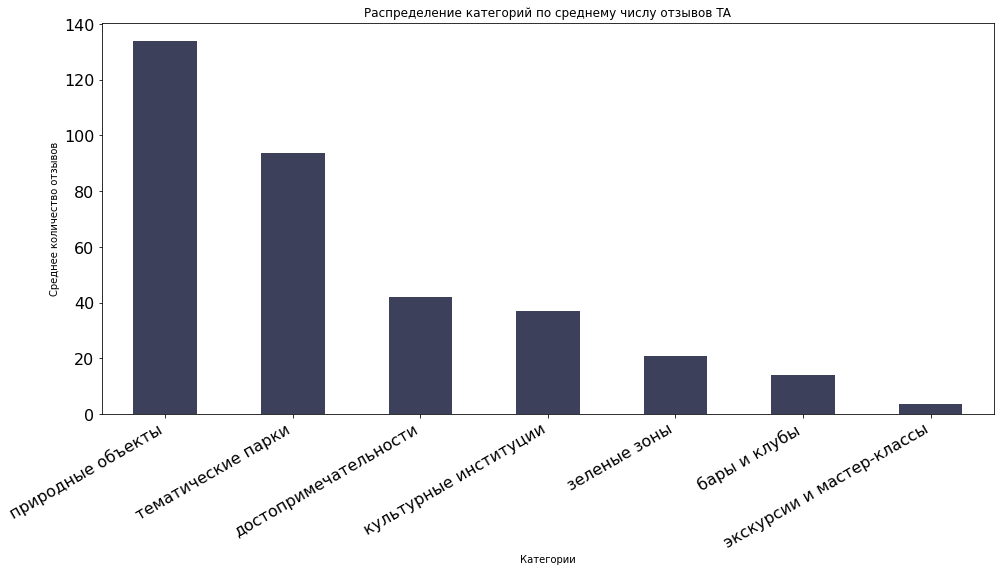

In [63]:
places_df.groupby('Category AN').mean()['count_review'].sort_values(ascending = False).plot.bar(color ="#3D405B", figsize = (16, 8), fontsize=16)
plt.gcf().autofmt_xdate()
# plt.f
plt.xlabel('Категории')
plt.ylabel('Среднее количество отзывов')
plt.title('Распределение категорий по среднему числу отзывов TA')

Text(0.5, 1.0, 'Распределение категорий по медиане числа отзывов GP')

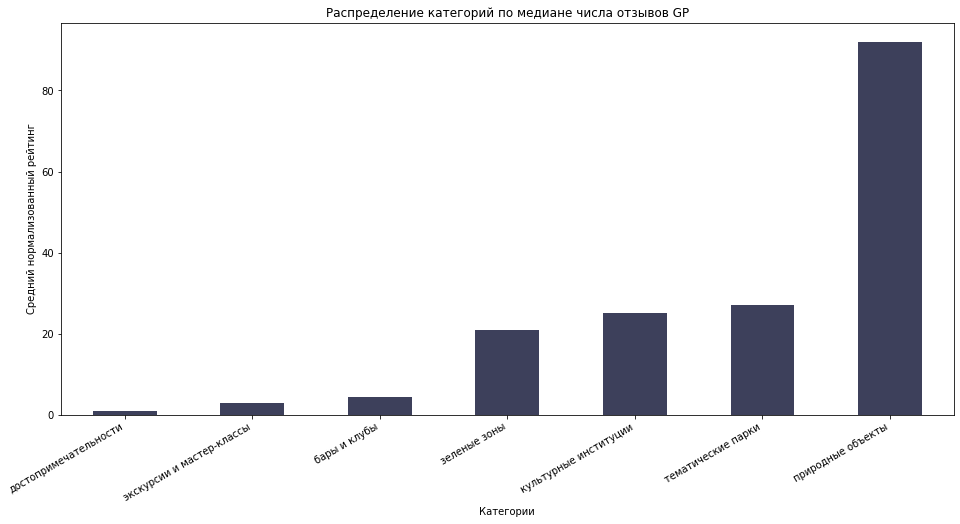

In [12]:
places_df.groupby('Category AN').median()['count_review'].sort_values().plot.bar(color ="#3D405B", figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.title('Распределение категорий по медиане числа отзывов GP')

# Сравнение распределений категорий по числу отзывов и фото

Text(0.5, 1.0, 'Распределение категорий по медиане числа отзывов и фотографий GP')

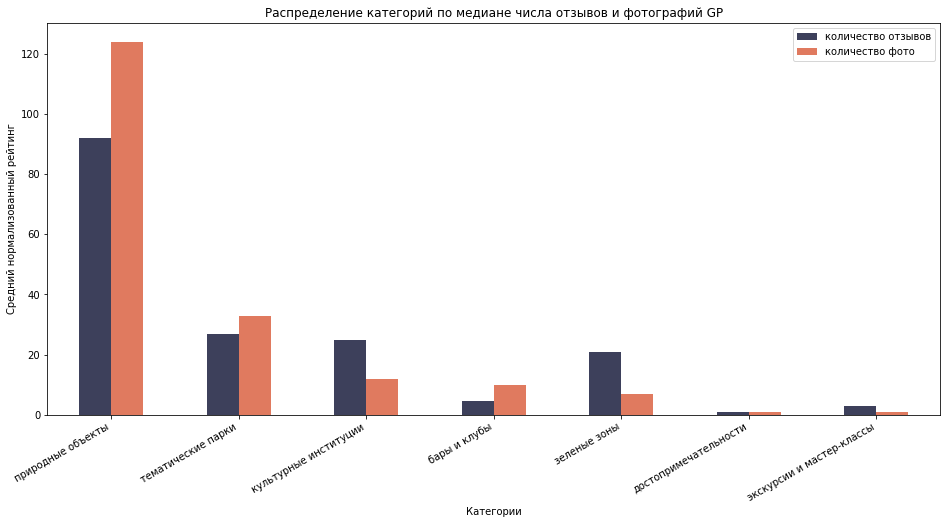

In [16]:
places_df.groupby('Category AN').median()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.legend(['количество отзывов', "количество фото"])
plt.title('Распределение категорий по медиане числа отзывов и фотографий GP')

Text(0.5, 1.0, 'Распределение категорий по среднему числу отзывов и фотографий GP')

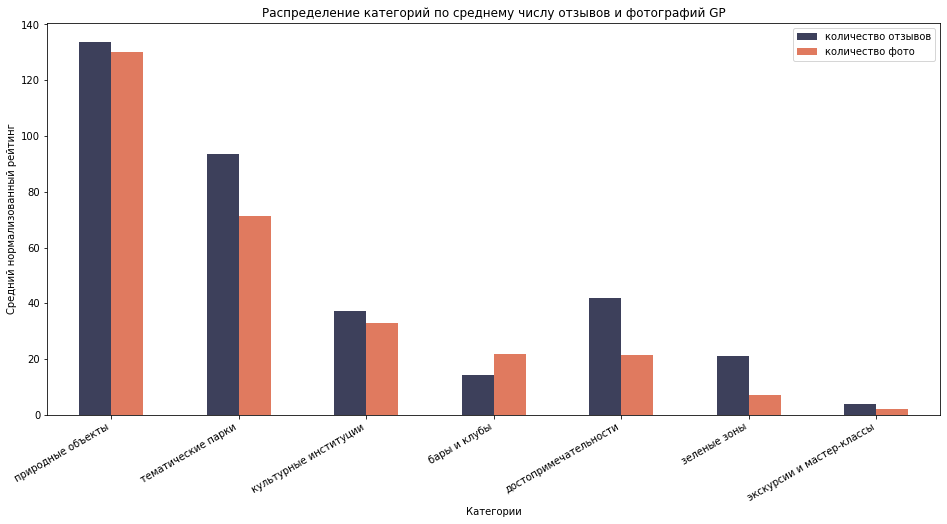

In [15]:
places_df.groupby('Category AN').mean()[['count_review', 'count_photo']].sort_values('count_photo', ascending = False)\
    .plot.bar(color =["#3D405B", "#E07A5F"],figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Категории')
plt.ylabel('Средний нормализованный рейтинг')
plt.legend(['количество отзывов', "количество фото"])
plt.title('Распределение категорий по среднему числу отзывов и фотографий GP')

# Распределение мест по итоговому рейтингу и категориям

In [18]:
places_df.sort_values('normalized_rating', ascending = False)[:20]['Category AN'].drop_duplicates()

2       тематические парки
1        природные объекты
0    достопримечательности
4    культурные институции
7             бары и клубы
Name: Category AN, dtype: object

In [19]:
places_df['Category AN'].fillna('', inplace = True)

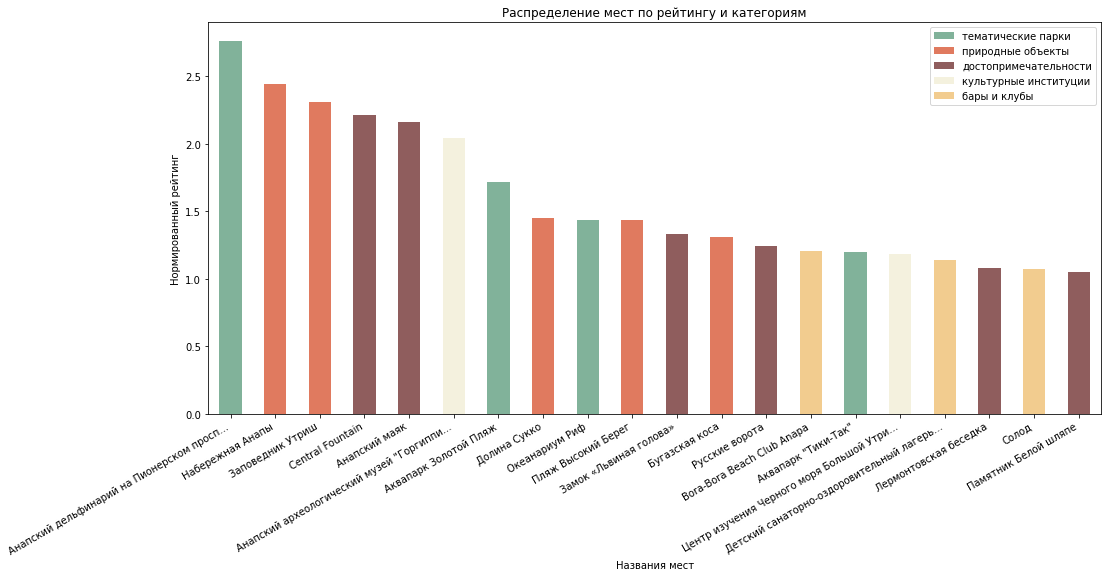

In [30]:
dict_colors = {'тематические парки': "#81B29A", "природные объекты": "#E07A5F", "достопримечательности":"#8f5d5d", "культурные институции": "#F4F1DE", "бары и клубы":"#F2CC8F"}
plot_df = places_df.sort_values('normalized_rating', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df = plot_df.set_index('title').sort_values('normalized_rating', ascending = False)[['Category AN','normalized_rating']][:20]
plot_df['normalized_rating'].plot.bar( color = plot_df['Category AN'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормированный рейтинг')
plt.title('Распределение мест по рейтингу и категориям')
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)
# display(plot_df)

In [33]:
hotels_df.sort_values('normalized_rating', ascending = False)[:20]['category'].drop_duplicates()

36                    Отель
146    Российский пансионат
45             Гостевой дом
109     Курорт особого типа
41     Российский санаторий
Name: category, dtype: object

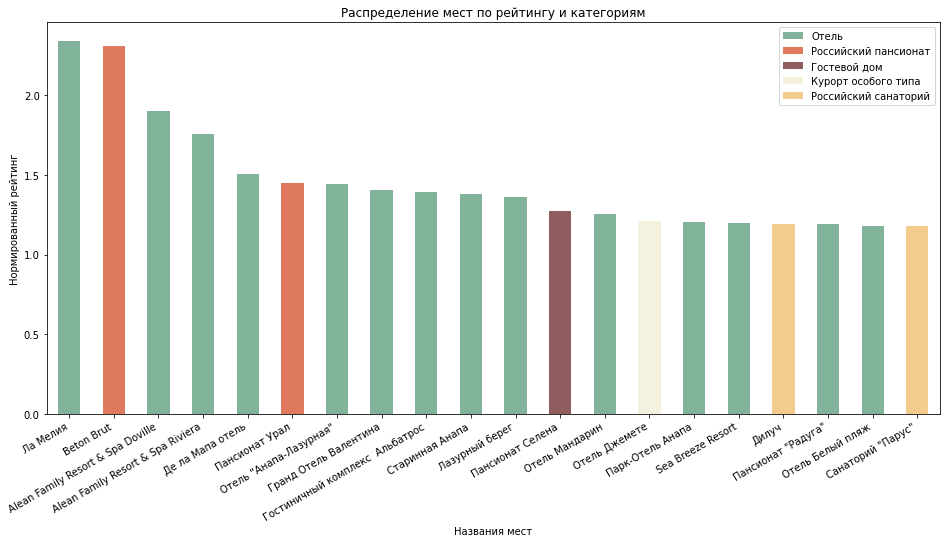

In [34]:
dict_colors = {'Отель': "#81B29A", "Российский пансионат": "#E07A5F", "Гостевой дом":"#8f5d5d", "Курорт особого типа": "#F4F1DE", "Российский санаторий":"#F2CC8F"}
plot_df = hotels_df.sort_values('normalized_rating', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df = plot_df.set_index('title').sort_values('normalized_rating', ascending = False)[['category','normalized_rating']][:20]
plot_df['normalized_rating'].plot.bar( color = plot_df['category'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормированный рейтинг')
plt.title('Распределение мест по рейтингу и категориям')
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)
# display(plot_df)

# Распределение мест по фотографиям и категориям

In [21]:
places_df.category.fillna('', inplace = True)
places_df.sort_values('count_photo', ascending = False)[:20]['Category AN'].drop_duplicates()

3        природные объекты
2       тематические парки
4    культурные институции
5    достопримечательности
7             бары и клубы
Name: Category AN, dtype: object

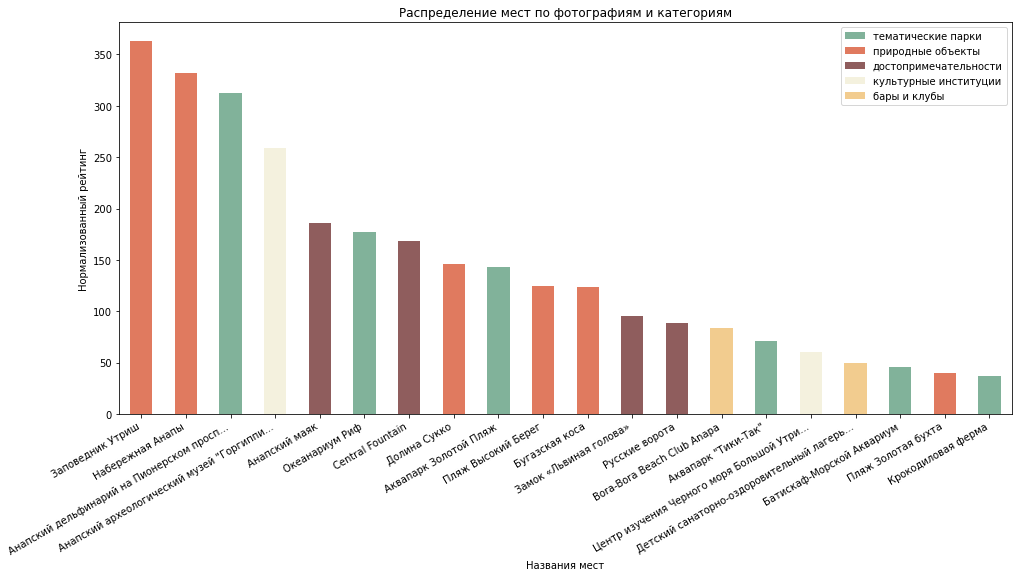

In [23]:
dict_colors = {'тематические парки': "#81B29A", "природные объекты": "#E07A5F", "достопримечательности":"#8f5d5d", "культурные институции": "#F4F1DE", "бары и клубы":"#F2CC8F"}
plot_df = places_df.sort_values('count_photo', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df.set_index('title')['count_photo'].plot.bar( color = plot_df['Category AN'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title("Распределение мест по фотографиям и категориям")
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Распределение мест по отзывам и категориям

In [24]:
places_df.category.fillna('', inplace = True)
places_df.sort_values('count_review', ascending = False)[:20]['Category AN'].drop_duplicates()

2       тематические парки
0    достопримечательности
1        природные объекты
4    культурные институции
7             бары и клубы
Name: Category AN, dtype: object

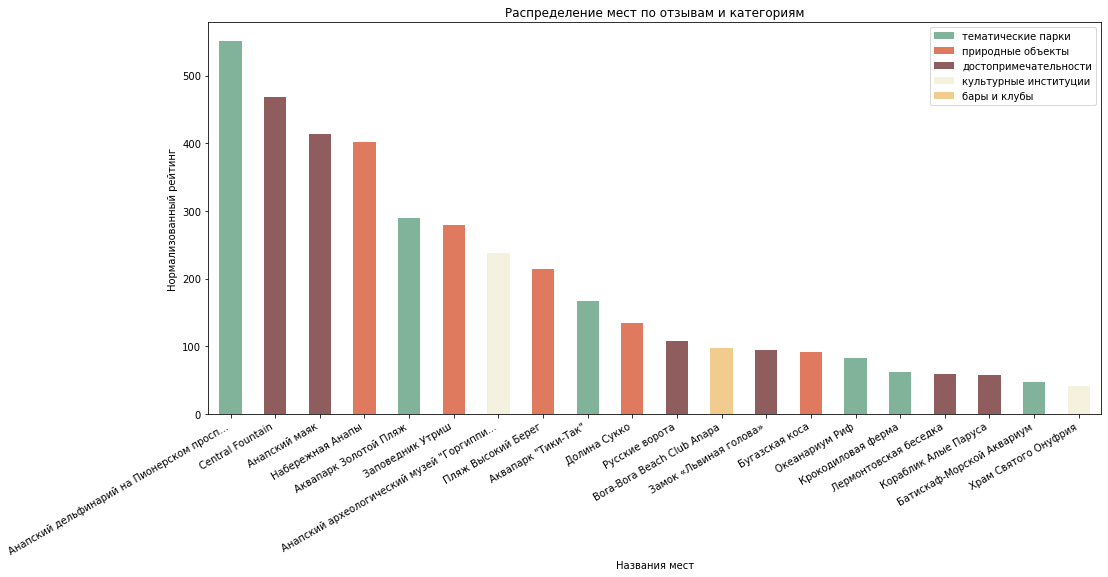

In [25]:
dict_colors = {'тематические парки': "#81B29A", "природные объекты": "#E07A5F", "достопримечательности":"#8f5d5d", "культурные институции": "#F4F1DE", "бары и клубы":"#F2CC8F"}
plot_df = places_df.sort_values('count_review', ascending = False)[:20]
plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
plot_df.set_index('title')['count_review'].plot.bar( color = plot_df['Category AN'].replace(dict_colors), figsize = (16, 8))
plt.gcf().autofmt_xdate()
plt.xlabel('Названия мест')
plt.ylabel('Нормализованный рейтинг')
plt.title("Распределение мест по отзывам и категориям")
legend_elements = [Patch(facecolor=dict_colors[c], label=c) for c in  dict_colors.keys()]
plt.legend(handles=legend_elements)

# Популярность мест по категориям

In [97]:
places_df.drop_duplicates(['title', 'category', 'rating_by_category'])

,url,title,address,type,popular_times_bars,geometry,types,category_2,category,url_agg,count_review,count_photo,rating,rating_by_category,normalized_rating
0,https://www.google.com/maps/place/?q=place_id:...,"Новый век, СФ","ул. Демуса, 60, Краснодар, Краснодарский край,...",Строительная компания,NaN,POINT (39.09852739999999 45.0494082),"['general_contractor', 'point_of_interest', 'e...",NaN,,https://www.google.com/maps/place/?q=place_id:...,2.0,3.0,5.0,0.000000,1.000106
1,https://www.google.com/maps/place/?q=place_id:...,Магазин автоприцепов,"ул. Ростовское ш., 24/1, Краснодар, Краснодарс...",Продажа прицепов,NaN,POINT (38.9911055 45.08962769999999),"['point_of_interest', 'store', 'establishment']",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,2.0,6.0,4.5,0.900347,0.900156
2,https://www.google.com/maps/place/?q=place_id:...,Pepe магазин детской одежды,"Краснодар, Краснодарский край, 350901",Магазин одежды,NaN,POINT (39.0382925 45.0743813),"['point_of_interest', 'establishment']",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
3,https://www.google.com/maps/place/?q=place_id:...,Трейд Инвест,"ул. Тихорецкая, 8, Краснодар, Краснодарский кр...",Оптовая продажа строительных материалов,NaN,POINT (39.0377053 45.0395949),"['general_contractor', 'point_of_interest', 'e...",NaN,,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
4,https://www.google.com/maps/place/?q=place_id:...,Первый Риэлт Центр,"Краснодар, Краснодарский край, 350000",Агентство недвижимости,NaN,POINT (38.972604 45.035117),"['real_estate_agency', 'point_of_interest', 'e...",Услуга,Услуга,https://www.google.com/maps/place/?q=place_id:...,0.0,0.0,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,https://www.google.com/maps/place/?q=place_id:...,Мадьяр-Гриль,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Ресторан,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.9831636 45.1007007),"['restaurant', 'bar', 'food', 'point_of_intere...",Общепит,Общепит,https://www.google.com/maps/place/?q=place_id:...,170.0,32.0,4.6,0.976035,0.925277
15521,https://www.google.com/maps/place/?q=place_id:...,DNS,"ул. Дзержинского, 100, Краснодар, Краснодарски...",Магазин электроники,"['Загруженность в 06:00: 0%.', 'Загруженность ...",POINT (38.983847 45.10220899999999),"['electronics_store', 'home_goods_store', 'poi...",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,71.0,19.0,4.1,0.823450,0.822298
15522,https://www.google.com/maps/place/?q=place_id:...,"Ригла, ООО, сеть аптек","ул. Кубанская набережная, 25А, Краснодар, Крас...",Аптека,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594357 45.0219355),"['pharmacy', 'health', 'point_of_interest', 's...",Магазин,Магазин,https://www.google.com/maps/place/?q=place_id:...,9.0,4.0,2.3,0.460510,0.460318
15523,https://www.google.com/maps/place/?q=place_id:...,"Патрик & Мари, Сеть кулинарий","ул. Кубанская набережная, 35, Краснодар, Красн...",Кафе-кондитерская,"['Загруженность в 04:00: 0%.', 'Загруженность ...",POINT (38.9594648 45.0246223),"['meal_delivery', 'bakery', 'food', 'point_of_...",Общепит,Общепит,https://www.google.com/maps/place/?q=place_id:...,225.0,188.0,4.5,0.993235,0.909406


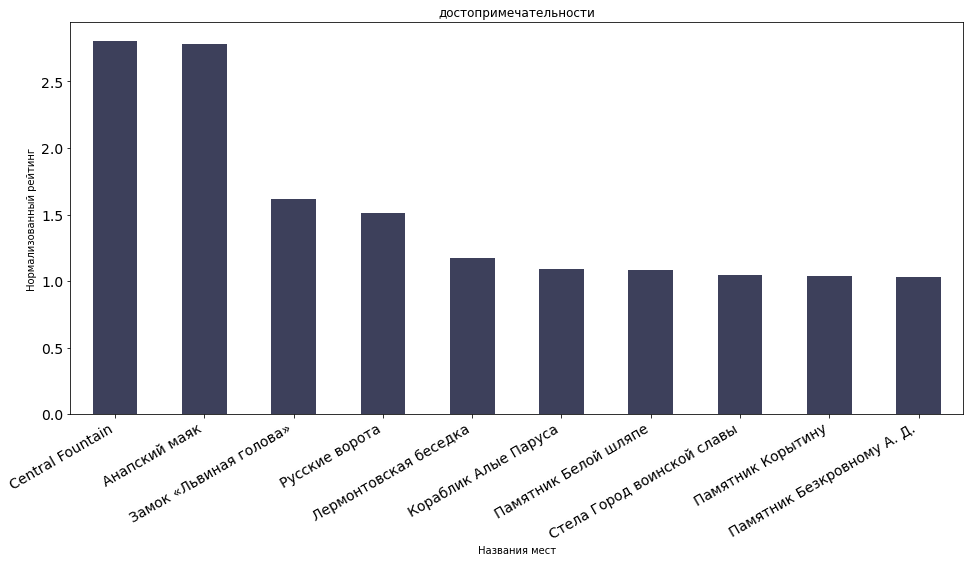

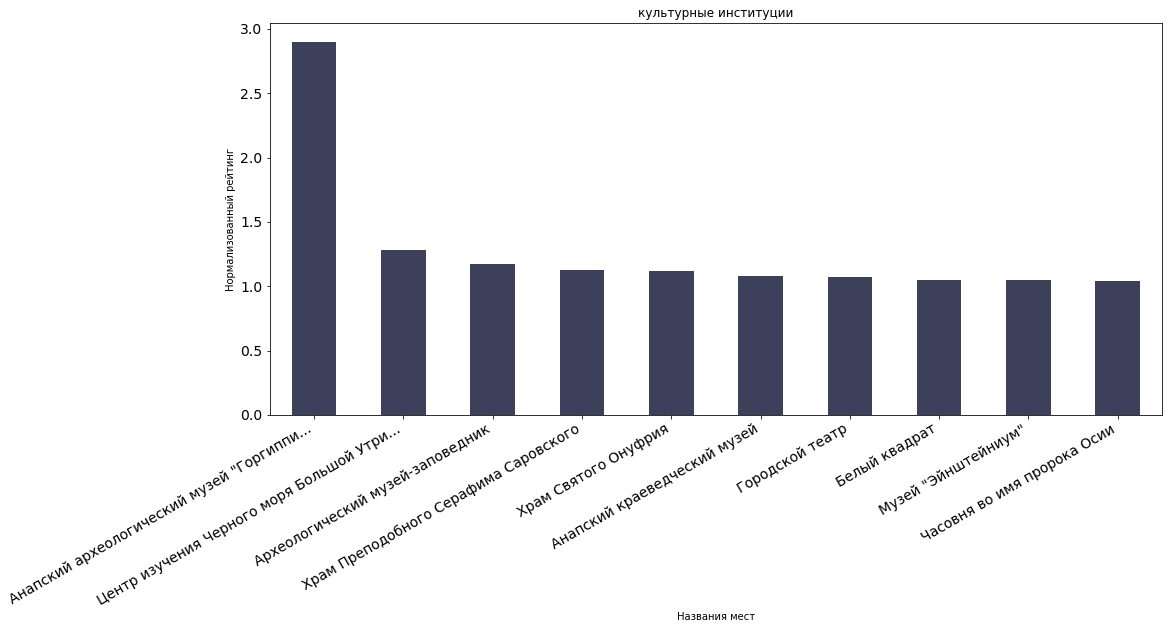

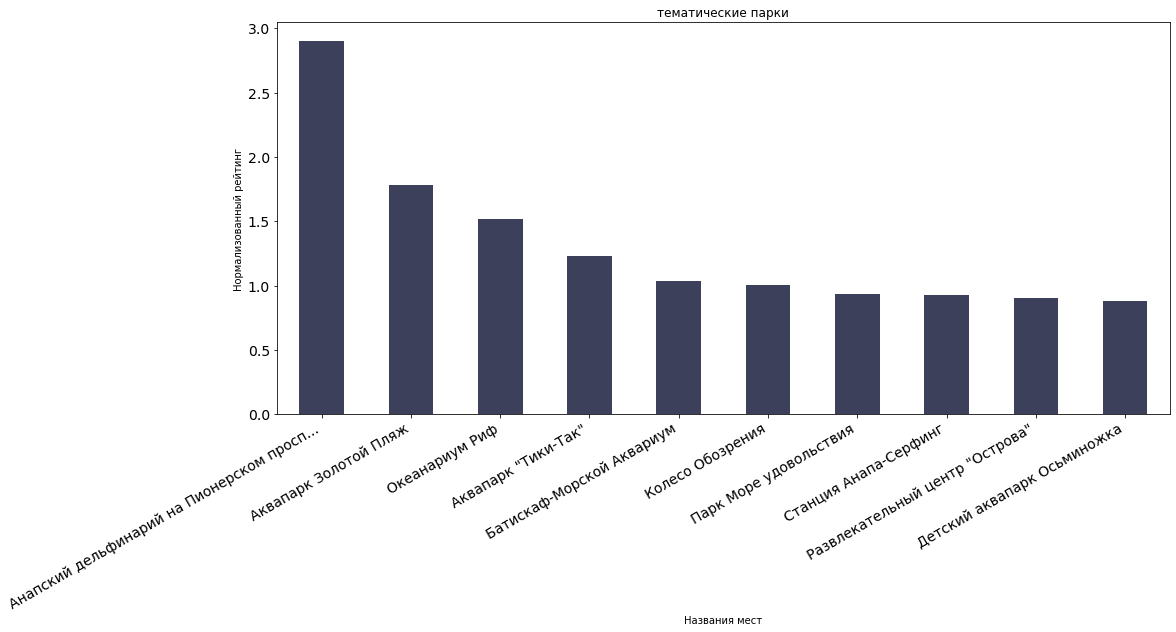

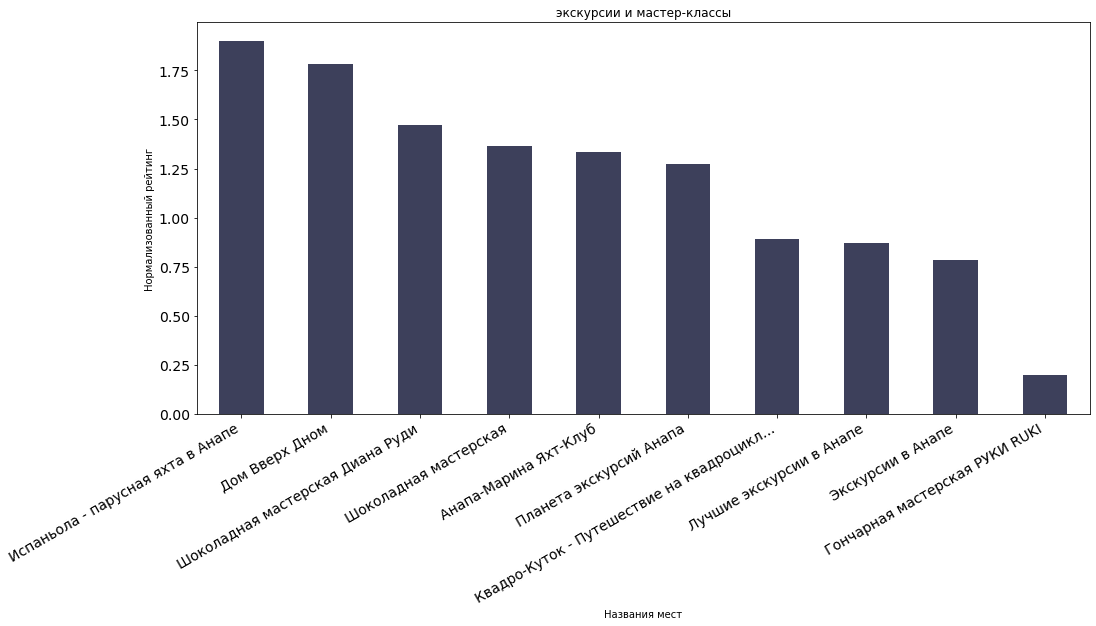

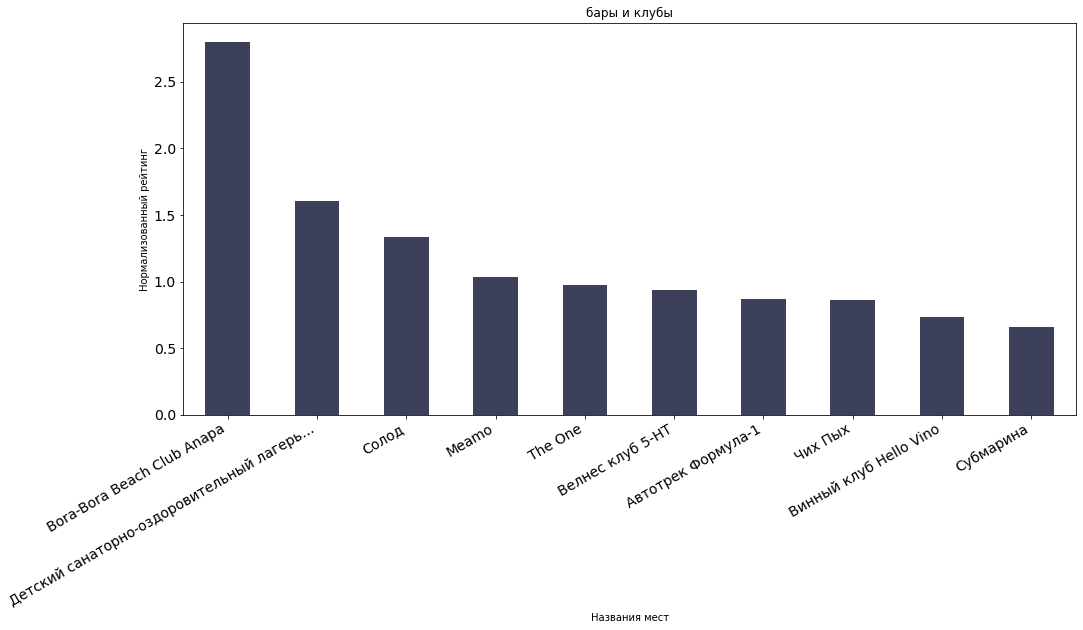

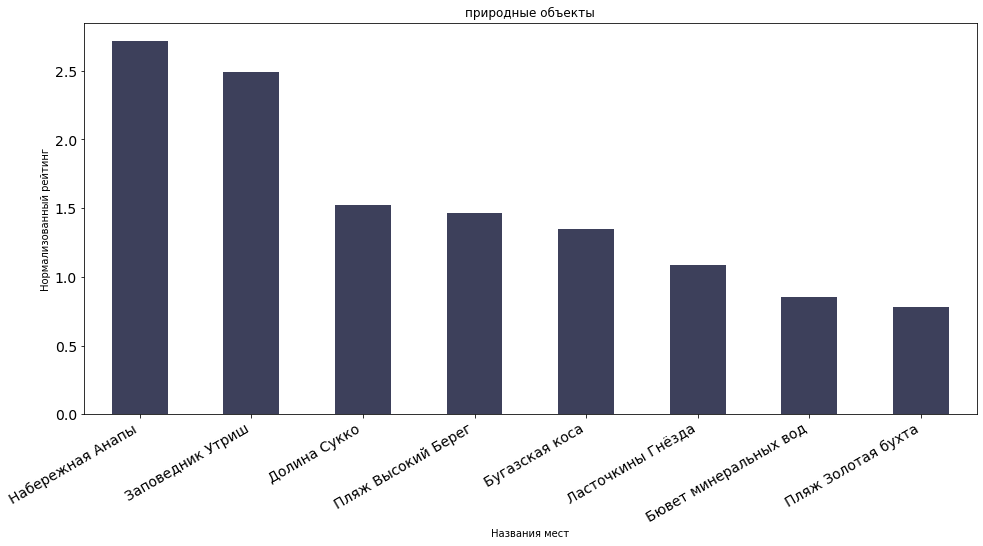

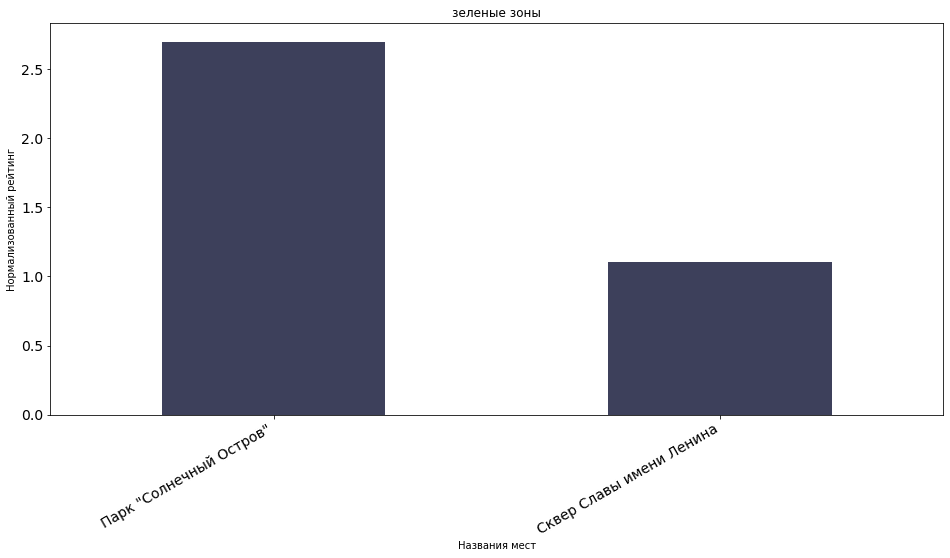

In [26]:
list_top=[]
for i in places_df.drop_duplicates(['title', 'Category AN', 'rating_by_category']).loc[places_df['Category AN']!='']['Category AN'].value_counts().keys():
    plot_df = places_df.drop_duplicates(['title', 'Category AN', 'rating_by_category']).loc[(places_df['Category AN']==i)&(places_df.rating_by_category!=0)].sort_values('rating_by_category', ascending = False)[:10]
    list_top.append(plot_df)
    plot_df.title = plot_df.title.apply(lambda x: x[:40]+'...' if len(x)>40 else x)
    
    plot_df.set_index('title')['rating_by_category'].plot.bar(color ="#3D405B" , figsize = (16, 8), fontsize=14)
    plt.title(i)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Названия мест')
    plt.ylabel('Нормализованный рейтинг')
    plt.show()